In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
srinagar_meteo = pd.read_csv('/kaggle/input/jk-aqi/Jammu and Kashmir/Metrological Data/Srinagar.csv', delimiter=',')
srinagar_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,-3.3,76,0.0,841.0,3.4,4.7,72,203
1,2024-01-01T01:00,-1.3,73,0.0,843.3,2.3,3.4,18,288
2,2024-01-01T02:00,-1.6,71,0.0,843.9,3.6,5.5,84,203
3,2024-01-01T03:00,-2.0,69,0.0,844.4,3.3,3.9,84,202
4,2024-01-01T04:00,1.4,61,0.0,846.8,4.2,5.6,211,220
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,-7.0,83,0.0,840.8,1.3,1.1,45,279
8780,2024-12-31T20:00,-7.2,84,0.0,840.9,1.9,3.3,56,174
8781,2024-12-31T21:00,-7.5,84,0.0,840.6,2.6,4.2,51,155
8782,2024-12-31T22:00,-7.9,80,0.0,840.3,2.4,6.3,54,153


In [3]:
srinagar_pollutants = pd.read_csv('/kaggle/input/jk-aqi/Jammu and Kashmir/Pollutants/Srinagar.csv', delimiter= ',')
srinagar_pollutants['Timestamp'] = srinagar_meteo['time']
srinagar_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
srinagar_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,265.77,316.50,NaN,NaN,NaN,NaN,6.75,0.40,6.02,...,NaN,NaN,NaN,0.26,157.13,0.0,0.0,1.45,NaN,NaN
1,2024-01-01T01:00,45.05,136.57,NaN,NaN,NaN,NaN,6.77,0.40,6.04,...,NaN,NaN,NaN,0.16,183.64,0.0,0.0,2.05,NaN,NaN
2,2024-01-01T02:00,12.85,38.95,NaN,NaN,NaN,NaN,6.58,0.41,5.90,...,NaN,NaN,NaN,0.12,200.37,0.0,0.0,1.12,NaN,NaN
3,2024-01-01T03:00,11.05,33.52,NaN,NaN,NaN,NaN,6.61,0.39,5.71,...,NaN,NaN,NaN,0.07,274.07,0.0,0.0,1.60,NaN,NaN
4,2024-01-01T04:00,10.85,32.95,NaN,NaN,NaN,NaN,13.44,0.42,5.73,...,NaN,NaN,NaN,0.10,162.84,0.0,0.0,1.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,14.80,38.20,NaN,NaN,NaN,NaN,NaN,0.26,2.10,...,1.95,NaN,NaN,0.08,91.74,0.0,0.0,6.80,NaN,NaN
8780,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [4]:
srinagar= pd.merge(srinagar_meteo.iloc[:, :], srinagar_pollutants.iloc[:, 0:3], on='time')
srinagar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,-3.3,76,0.0,841.0,3.4,4.7,72,203,265.77,316.50
1,2024-01-01T01:00,-1.3,73,0.0,843.3,2.3,3.4,18,288,45.05,136.57
2,2024-01-01T02:00,-1.6,71,0.0,843.9,3.6,5.5,84,203,12.85,38.95
3,2024-01-01T03:00,-2.0,69,0.0,844.4,3.3,3.9,84,202,11.05,33.52
4,2024-01-01T04:00,1.4,61,0.0,846.8,4.2,5.6,211,220,10.85,32.95
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,-7.0,83,0.0,840.8,1.3,1.1,45,279,14.80,38.20
8780,2024-12-31T20:00,-7.2,84,0.0,840.9,1.9,3.3,56,174,NaN,NaN
8781,2024-12-31T21:00,-7.5,84,0.0,840.6,2.6,4.2,51,155,NaN,NaN
8782,2024-12-31T22:00,-7.9,80,0.0,840.3,2.4,6.3,54,153,NaN,NaN


In [5]:
srinagar['city'] = 'Srinagar'
srinagar

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,-3.3,76,0.0,841.0,3.4,4.7,72,203,265.77,316.50,Srinagar
1,2024-01-01T01:00,-1.3,73,0.0,843.3,2.3,3.4,18,288,45.05,136.57,Srinagar
2,2024-01-01T02:00,-1.6,71,0.0,843.9,3.6,5.5,84,203,12.85,38.95,Srinagar
3,2024-01-01T03:00,-2.0,69,0.0,844.4,3.3,3.9,84,202,11.05,33.52,Srinagar
4,2024-01-01T04:00,1.4,61,0.0,846.8,4.2,5.6,211,220,10.85,32.95,Srinagar
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,-7.0,83,0.0,840.8,1.3,1.1,45,279,14.80,38.20,Srinagar
8780,2024-12-31T20:00,-7.2,84,0.0,840.9,1.9,3.3,56,174,NaN,NaN,Srinagar
8781,2024-12-31T21:00,-7.5,84,0.0,840.6,2.6,4.2,51,155,NaN,NaN,Srinagar
8782,2024-12-31T22:00,-7.9,80,0.0,840.3,2.4,6.3,54,153,NaN,NaN,Srinagar


In [6]:
srinagar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             3572 non-null   float64
 10  PM10 (µg/m³)              3570 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
srinagar_interpolated = srinagar.interpolate()
srinagar_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    srinagar_interpolated[delay1_col] = srinagar_interpolated[col].shift(1)
    delay2_col = col + "_delay2"
    srinagar_interpolated[delay2_col] = srinagar_interpolated[col].shift(2)
    srinagar_interpolated.loc[0, delay1_col] = srinagar_interpolated[col].iloc[-1]
    srinagar_interpolated.loc[1, delay2_col] = srinagar_interpolated[col].iloc[-1]
    srinagar_interpolated.loc[0, delay2_col] = srinagar_interpolated[col].iloc[-2]

srinagar_interpolated

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,-3.3,76,0.0,841.0,3.4,4.7,72,203,265.77,316.50,Srinagar,14.80,14.800000,38.20,38.200000
1,2024-01-01T01:00,-1.3,73,0.0,843.3,2.3,3.4,18,288,45.05,136.57,Srinagar,265.77,14.800000,316.50,38.200000
2,2024-01-01T02:00,-1.6,71,0.0,843.9,3.6,5.5,84,203,12.85,38.95,Srinagar,45.05,265.770000,136.57,316.500000
3,2024-01-01T03:00,-2.0,69,0.0,844.4,3.3,3.9,84,202,11.05,33.52,Srinagar,12.85,45.050000,38.95,136.570000
4,2024-01-01T04:00,1.4,61,0.0,846.8,4.2,5.6,211,220,10.85,32.95,Srinagar,11.05,12.850000,33.52,38.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,-7.0,83,0.0,840.8,1.3,1.1,45,279,14.80,38.20,Srinagar,16.80,16.681667,43.50,43.180833
8780,2024-12-31T20:00,-7.2,84,0.0,840.9,1.9,3.3,56,174,14.80,38.20,Srinagar,14.80,16.800000,38.20,43.500000
8781,2024-12-31T21:00,-7.5,84,0.0,840.6,2.6,4.2,51,155,14.80,38.20,Srinagar,14.80,14.800000,38.20,38.200000
8782,2024-12-31T22:00,-7.9,80,0.0,840.3,2.4,6.3,54,153,14.80,38.20,Srinagar,14.80,14.800000,38.20,38.200000


In [9]:
srinagar_clean = srinagar.dropna().reset_index(drop=True)
srinagar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      3568 non-null   object 
 1   temperature_2m (°C)       3568 non-null   float64
 2   relative_humidity_2m (%)  3568 non-null   int64  
 3   rain (mm)                 3568 non-null   float64
 4   surface_pressure (hPa)    3568 non-null   float64
 5   wind_speed_10m (km/h)     3568 non-null   float64
 6   wind_speed_100m (km/h)    3568 non-null   float64
 7   wind_direction_10m (°)    3568 non-null   int64  
 8   wind_direction_100m (°)   3568 non-null   int64  
 9   PM2.5 (µg/m³)             3568 non-null   float64
 10  PM10 (µg/m³)              3568 non-null   float64
 11  city                      3568 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 334.6+ KB


In [10]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    srinagar_clean[delay1_col] = srinagar_clean[col].shift(1)
    delay2_col = col + "_delay2"
    srinagar_clean[delay2_col] = srinagar_clean[col].shift(2)
    srinagar_clean.loc[0, delay1_col] = srinagar_clean[col].iloc[-1]
    srinagar_clean.loc[1, delay2_col] = srinagar_clean[col].iloc[-1]
    srinagar_clean.loc[0, delay2_col] = srinagar_clean[col].iloc[-2]

srinagar_clean

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,-3.3,76,0.0,841.0,3.4,4.7,72,203,265.77,316.50,Srinagar,14.80,16.80,38.20,43.50
1,2024-01-01T01:00,-1.3,73,0.0,843.3,2.3,3.4,18,288,45.05,136.57,Srinagar,265.77,14.80,316.50,38.20
2,2024-01-01T02:00,-1.6,71,0.0,843.9,3.6,5.5,84,203,12.85,38.95,Srinagar,45.05,265.77,136.57,316.50
3,2024-01-01T03:00,-2.0,69,0.0,844.4,3.3,3.9,84,202,11.05,33.52,Srinagar,12.85,45.05,38.95,136.57
4,2024-01-01T04:00,1.4,61,0.0,846.8,4.2,5.6,211,220,10.85,32.95,Srinagar,11.05,12.85,33.52,38.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,2024-12-31T04:00,-4.1,62,0.0,845.6,0.8,3.9,63,152,17.40,45.15,Srinagar,17.73,17.80,45.95,46.18
3564,2024-12-31T05:00,-0.7,60,0.0,847.6,1.5,1.6,249,297,16.98,44.05,Srinagar,17.40,17.73,45.15,45.95
3565,2024-12-31T06:00,0.8,56,0.0,847.7,2.5,5.0,270,285,15.38,39.67,Srinagar,16.98,17.40,44.05,45.15
3566,2024-12-31T18:00,-6.5,78,0.0,841.1,1.8,2.0,45,355,16.80,43.50,Srinagar,15.38,16.98,39.67,44.05


In [11]:
srinagar_interpolated['city'] = srinagar_interpolated['city'].astype('category')
srinagar_clean['city'] = srinagar_clean['city'].astype('category')

In [12]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

## Testing for interpolated data

In [13]:
X, y = srinagar_interpolated[input_cols], srinagar_interpolated[target_cols]

In [14]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y['PM2.5 (µg/m³)'], test_size=0.2, random_state=42)

In [16]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=50,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [17]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
pred_check = model.predict(X_val)

In [20]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, pred_check)
print("R² score:", r2)

R² score: 0.2797235401102184


## Testing for clean data

In [21]:
X, y = srinagar_clean[input_cols], srinagar_clean[target_cols]

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y['PM2.5 (µg/m³)'], test_size=0.2, random_state=42)

In [23]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
pred_check = model.predict(X_val)

In [26]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, pred_check)
print("R² score:", r2)

R² score: 0.5922938564350289


===> Much better r2 score

In [27]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
pred_check = model.predict(X)

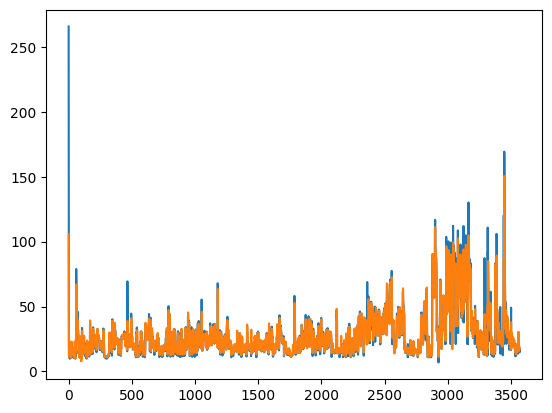

In [29]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9050086951130392


In [31]:
import joblib
joblib.dump(model, 'JK_PM2.5_µgm³.pkl')

['JK_PM2.5_µgm³.pkl']

In [32]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
pred_check2 = model.predict(X)

In [34]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9205381630468612


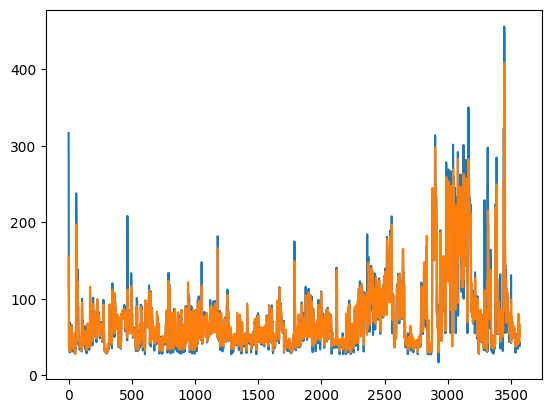

In [35]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [36]:
joblib.dump(model, 'JK_PM10_µgm³.pkl')

['JK_PM10_µgm³.pkl']